### 목적 : 리뷰로부터 인사이트를 얻고, 감성분석 해보기

### DATA OVERVIEW
- 데이터셋은 아마존의 알렉사 제품에 대한, 3000개의 리뷰로 되어있습니다.
- 컬럼은 rating,	date,	variation(제품모델),	verified_reviews,	feedback
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
- 자료: 'amazon_alexa.tsv'

### 1. 패키지 설치
- 분석 전에 Anaconda Prompt 실행 후, 'conda install -c conda-forge wordcloud' install 하기
- https://anaconda.org/conda-forge/wordcloud
- wordcloud 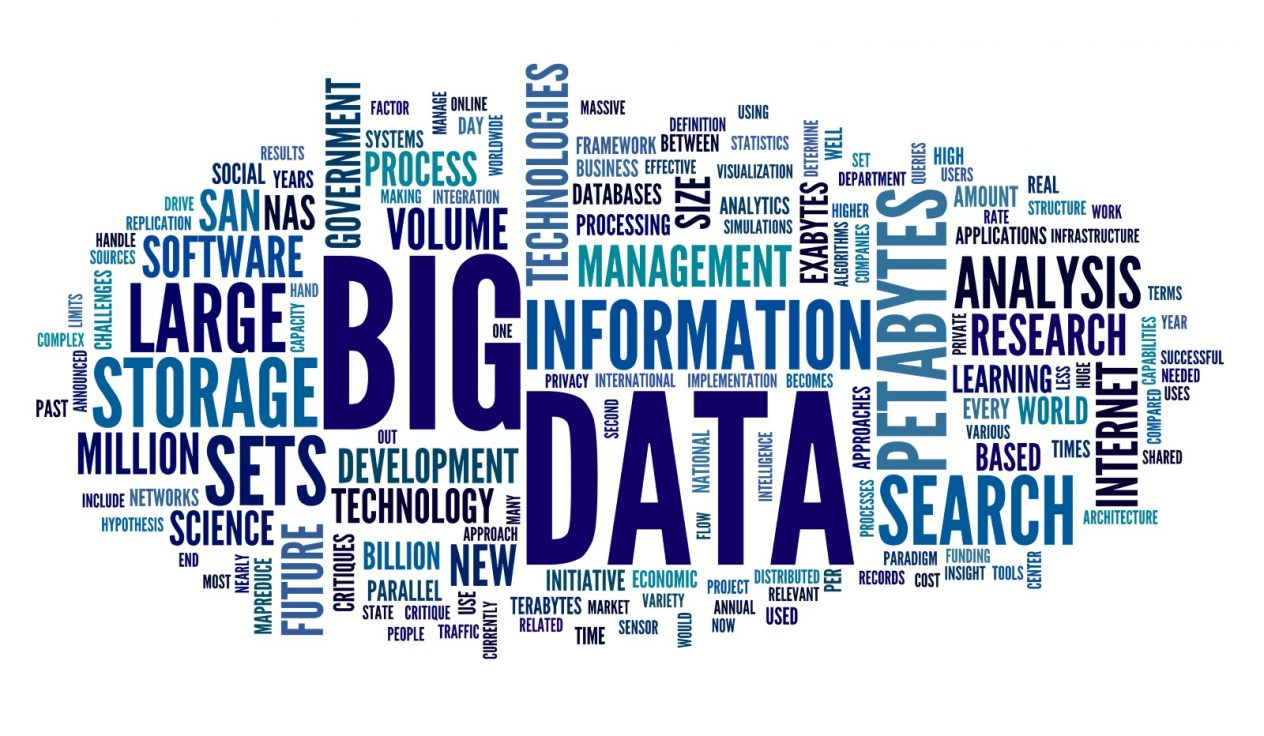

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sb # Statistical data visualization
%matplotlib inline

In [39]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [40]:
df =pd.read_csv('amazon_alexa.tsv', sep='\t')

# https://mskim8717.tistory.com/82

In [41]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [42]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [43]:
df['date'].nunique()

77

In [44]:
df['date'].unique()

array(['31-Jul-18', '30-Jul-18', '29-Jul-18', '28-Jul-18', '27-Jul-18',
       '26-Jul-18', '25-Jul-18', '24-Jul-18', '23-Jul-18', '22-Jul-18',
       '21-Jul-18', '20-Jul-18', '19-Jul-18', '18-Jul-18', '17-Jul-18',
       '16-Jul-18', '15-Jul-18', '14-Jul-18', '13-Jul-18', '12-Jul-18',
       '11-Jul-18', '10-Jul-18', '9-Jul-18', '8-Jul-18', '7-Jul-18',
       '6-Jul-18', '5-Jul-18', '4-Jul-18', '3-Jul-18', '2-Jul-18',
       '1-Jul-18', '30-Jun-18', '29-Jun-18', '28-Jun-18', '27-Jun-18',
       '26-Jun-18', '25-Jun-18', '24-Jun-18', '23-Jun-18', '22-Jun-18',
       '21-Jun-18', '20-Jun-18', '19-Jun-18', '18-Jun-18', '17-Jun-18',
       '16-Jun-18', '15-Jun-18', '14-Jun-18', '13-Jun-18', '12-Jun-18',
       '11-Jun-18', '10-Jun-18', '9-Jun-18', '8-Jun-18', '7-Jun-18',
       '6-Jun-18', '5-Jun-18', '4-Jun-18', '3-Jun-18', '2-Jun-18',
       '1-Jun-18', '31-May-18', '30-May-18', '29-May-18', '28-May-18',
       '27-May-18', '26-May-18', '25-May-18', '24-May-18', '23-May-18',
       '22

In [45]:
df['date'].sort_values()

470     1-Jul-18
469     1-Jul-18
468     1-Jul-18
2091    1-Jul-18
467     1-Jul-18
          ...   
432     9-Jul-18
431     9-Jul-18
428     9-Jul-18
430     9-Jul-18
583     9-Jun-18
Name: date, Length: 3150, dtype: object

In [46]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

### 2. feedback 긍정리뷰(1), 부정리뷰(0) 그래프로 파악해보기

In [47]:
df['feedback']

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [48]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

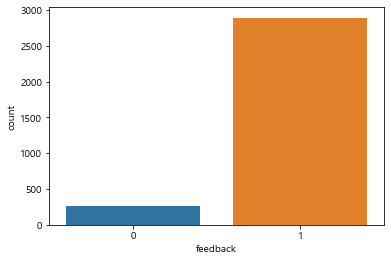

In [49]:
sb.countplot(data=df, x='feedback')
plt.show()

### 3. rating 유저의 별점 별 리뷰 그래프로 파악해보기 

In [50]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


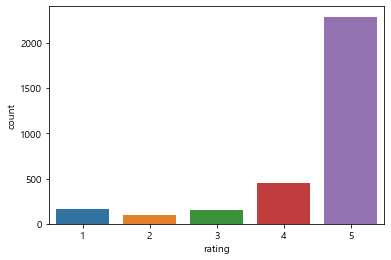

In [51]:
sb.countplot(data=df, x='rating')
plt.show()

### 4. wordcloud를 이용하여 유저들이 어떤 단어를 많이 사용했는지 시각화해보기

In [52]:
from wordcloud import WordCloud

In [53]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [54]:
# verified_reviews 를 하나의 문자열로 만들기 -> verified_reviews 가 하나의 문자열로 되어있어야 word cloud 가 처리할 수 있음

review_list = df['verified_reviews'].tolist()

In [55]:
review_list

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [56]:
words_as_one_string = ' '.join(review_list)

In [57]:
words_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [58]:
# 라이브러리 변수

wc = WordCloud(background_color='white')

In [59]:
my_cloud = wc.generate(words_as_one_string)

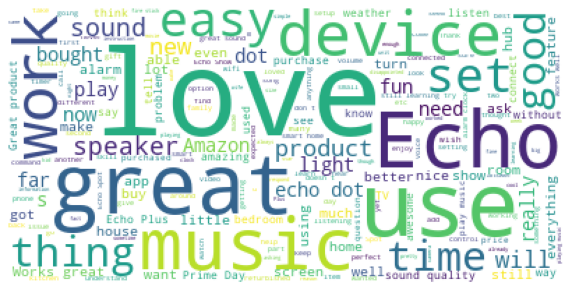

In [60]:
plt.figure(figsize=(10,15))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

### 5. 불용어(stopwords) ex) Alexa, one, will 등 삭제하기

In [61]:
from wordcloud import WordCloud, STOPWORDS

In [62]:
my_stopwords = STOPWORDS

In [63]:
my_stopwords.add('Alexa')
my_stopwords.add('one')

In [64]:
my_stopwords

{'Alexa',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'otherwise',
 

In [65]:
wc = WordCloud(background_color='white', stopwords=my_stopwords)

In [66]:
my_cloud = wc.generate(words_as_one_string)

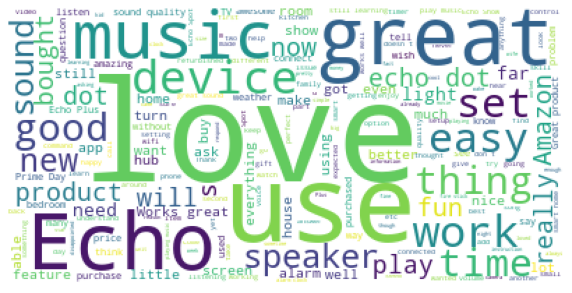

In [67]:
plt.figure(figsize=(10,15))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

### (Plus) 리뷰(verified_reviews)를 통해 다양한 시각화, 데이터 인사이트 뽑아내보기 ex) 리뷰와 별점간의 관계, 리뷰와 피드백간의 관계, 리뷰 속 단어들의 관계 등

In [68]:
# 리뷰(verified_reviews)와 별점(rating) 간에 얼마나 관계가 있는지 파악해보기 - 리뷰를 길게 써준 사람이 점수를 더 잘 줄까?

In [69]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [70]:
df['length'] = df['verified_reviews'].apply(len)

In [71]:
df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [72]:
df.loc[df['length'] == df['length'].max() , ]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [73]:
df.loc[df['length'] == df['length'].min() , ]

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


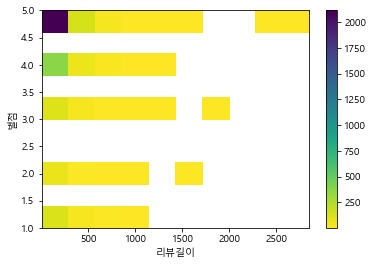

In [75]:
plt.hist2d(data=df, x='length', y='rating', cmin=0.5, cmap='viridis_r')
plt.xlabel('리뷰길이')
plt.ylabel('별점')
plt.colorbar()
plt.show()

In [76]:
df[['length','rating']].corr()

# 거의 관련 없음

,length,rating
length,1.000000,-0.193067
rating,-0.193067,1.000000
